In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
first_picture = cv2.imread('DATA/dog_backpack.jpg')
first_picture = cv2.cvtColor(first_picture, cv2.COLOR_BGR2RGB)
second_picture = cv2.imread('DATA/watermark_no_copy.png')
second_picture = cv2.cvtColor(second_picture, cv2.COLOR_BGR2RGB)
second_picture = cv2.resize(second_picture, (600, 600))

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [15]:
first_picture.shape

(1401, 934, 3)

In [16]:
region_to_be_overlayed = first_picture[1401-600:1401, 934-600:934]

In [18]:
blank_image_for_mask = np.full(second_picture.shape, 255, dtype = np.uint8)

In [19]:
gray_pic_for_mask = cv2.cvtColor(second_picture, cv2.COLOR_RGB2GRAY)

In [23]:
mask_for_image = cv2.bitwise_not(gray_pic_for_mask)

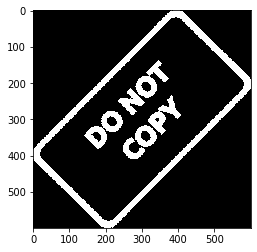

In [27]:
masked_with_blank_image = cv2.bitwise_or(blank_image_for_mask, blank_image_for_mask, mask = mask_for_image)
plt.imshow(masked_with_blank_image)

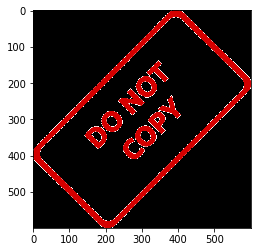

In [29]:
blended_second_image = cv2.bitwise_or(second_picture, second_picture, mask = mask_for_image)
plt.imshow(blended_second_image)

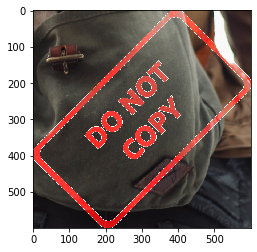

In [30]:
final_partial_blended = cv2.bitwise_or(region_to_be_overlayed, blended_second_image)
plt.imshow(final_partial_blended)

In [31]:
first_picture[1401-600:1401, 934-600:934] = final_partial_blended

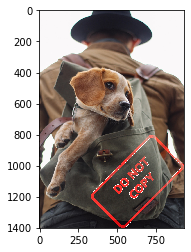

In [36]:
plt.imshow(first_picture)

In [35]:
cv2.imwrite('blended.jpg', first_picture)

True

In [31]:
gary = cv2.imread('DATA/rainbow.jpg', 0)
ret , temp = cv2.threshold(src = gary , thresh = 126, maxval = 255,type = cv2.THRESH_BINARY)

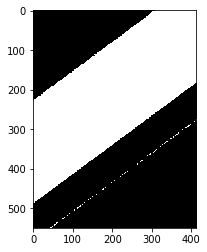

In [33]:
plt.imshow(temp ,cmap = 'gray')